In [1]:
pwd

'P:\\Projects\\puer\\notebooks'

In [2]:
cd ..

P:\Projects\puer


In [4]:
import pandas as pd
import numpy as np
from src.visualization.plots import plot_sent
%matplotlib inline

# Load stuff

In [5]:
base_df = pd.read_csv('data/score/SemEval14_test_baseline_v1.csv')
exp3_df = pd.read_csv('data/score/SemEval14_test_exp_3_v1.csv')
lexicon = pd.read_csv('data/processed/lexicon/lexicon_table.csv', index_col='WORD')

In [6]:
base_df.head()

,ASP,CLS,SENT,PRED,NEG,NEU,POS,ALPHA
0,food,1,the bread is top notch as well .,1,0.008854,0.008273,0.982873,"[0.005104960408061743, 0.0032664036843925714, ..."
1,service,1,i have to say they have one of the fastest del...,1,0.031988,0.105509,0.862503,"[0.019160743802785873, 0.0022917245514690876, ..."
2,food,1,food is always fresh and hot- ready to eat !,1,0.007820,0.007575,0.984606,"[0.0008278067107312381, 0.0014846435515210032,..."
3,food,1,did i mention that the coffee is outstanding ?,1,0.060383,0.054668,0.884950,"[0.006144334562122822, 0.014980634674429893, 0..."
4,ambience,1,"certainly not the best sushi in new york , how...",1,0.036716,0.006926,0.956358,"[0.002149326028302312, 0.0010587048018351197, ..."


In [7]:
(base_df.CLS == base_df.PRED).value_counts()[True]/len(base_df) # check if baseline acc correct

0.8211716341212744

In [8]:
exp3_df.head()

,ASP,CLS,SENT,PRED,NEG,NEU,POS,ALPHA
0,food,1,the bread is top notch as well .,1,0.012236,0.013007,0.974757,"[0.02019514888525009, 0.010086657479405403, 0...."
1,service,1,i have to say they have one of the fastest del...,1,0.043196,0.169718,0.787086,"[0.024016447365283966, 0.013345030136406422, 0..."
2,food,1,food is always fresh and hot- ready to eat !,1,0.006239,0.011919,0.981841,"[0.010474617592990398, 0.017595455050468445, 0..."
3,food,1,did i mention that the coffee is outstanding ?,1,0.103184,0.111462,0.785354,"[0.014308671467006207, 0.02559753507375717, 0...."
4,ambience,1,"certainly not the best sushi in new york , how...",1,0.055819,0.013617,0.930564,"[0.029549507424235344, 0.017148654907941818, 0..."


In [9]:
(exp3_df.CLS == exp3_df.PRED).value_counts()[True]/len(exp3_df) # check if exp3 acc correct

0.8314491264131552

In [10]:
exp3_improved = pd.read_csv('data/score/exp3_improved.csv', index_col='Unnamed: 0')
exp3_worse = pd.read_csv('data/score/exp3_worse.csv', index_col='Unnamed: 0')

In [11]:
exp3_improved.head()

,ASP,CLS,SENT,PRED,NEG,NEU,POS,PRED_E3,NEG_E3,NEU_E3,POS_E3
23,service,-1.0,the two waitress 's looked like they had been ...,1.0,0.336235,0.211024,0.452741,-1,0.440126,0.259519,0.300355
48,food,-1.0,how pretentious and inappropriate for mj grill...,1.0,0.215336,0.203960,0.580704,-1,0.470175,0.338154,0.191671
95,service,-1.0,i was highly disappointed by their service and...,1.0,0.134204,0.025842,0.839954,-1,0.600423,0.067349,0.332228
96,food,-1.0,i was highly disappointed by their service and...,1.0,0.134204,0.025842,0.839954,-1,0.600423,0.067349,0.332228
118,service,-1.0,the management was less than accomodating .,1.0,0.345240,0.101270,0.553490,-1,0.496270,0.202097,0.301633


In [12]:
exp3_worse.head()

,ASP,CLS,SENT,PRED,NEG,NEU,POS,PRED_E3,NEG_E3,NEU_E3,POS_E3
49,food,-1,two wasted steaks -- what a crime !,-1,0.438996,0.299798,0.261206,1.0,0.215030,0.272072,0.512898
72,miscellaneous,1,i 've been coming here on and off for the past...,1,0.132156,0.250443,0.617401,0.0,0.175869,0.487707,0.336424
188,ambience,0,the decor is designed in a contemporary japane...,0,0.069746,0.465243,0.465011,1.0,0.050318,0.088925,0.860758
241,miscellaneous,1,"people in the neighborhood seem to love it , t...",1,0.411946,0.172351,0.415703,-1.0,0.421715,0.235843,0.342442
245,miscellaneous,-1,have to tell you : not at all impressed .,-1,0.466236,0.121402,0.412362,1.0,0.281023,0.217869,0.501108


# Error Analsis

In [85]:
def compare(idx, figsize=(12,3)):
    sb = base_df.iloc[idx]
    plot_sent(sb.SENT.split(), sb.ALPHA, lexicon, title='Baseline', figsize=figsize)
    
    se = exp3_df.iloc[idx]
    plot_sent(se.SENT.split(), se.ALPHA, lexicon, title='Exp_3', figsize=figsize)
    
    print(f'PRED:  Base: {sb.PRED}, Exp3: {se.PRED}')
    print(f'LABEL: {sb.CLS}')
    print(f'ASP:   {sb.ASP}\n')
    print(f"{sb[['NEG', 'NEU', 'POS']].to_frame('BASE_PROB').transpose()}")
    print(f"{se[['NEG', 'NEU', 'POS']].to_frame('EXP3_PROB').transpose()}")

## Exp_3 improvements

**Interesting ones**

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   service

                NEG       NEU       POS
BASE_PROB  0.336235  0.211024  0.452741
                NEG       NEU       POS
EXP3_PROB  0.440126  0.259519  0.300355


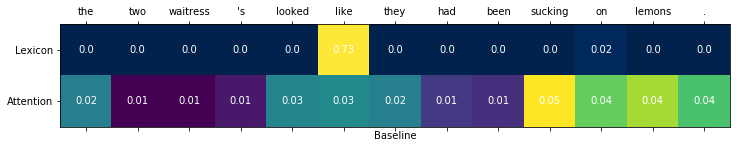

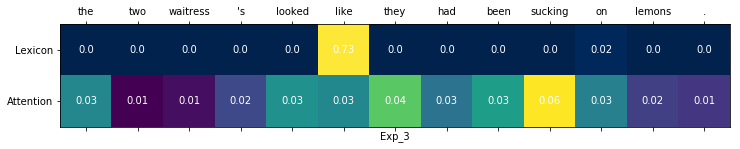

In [76]:
compare(23)

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   service

                NEG        NEU       POS
BASE_PROB  0.134204  0.0258417  0.839954
                NEG        NEU       POS
EXP3_PROB  0.600423  0.0673491  0.332228


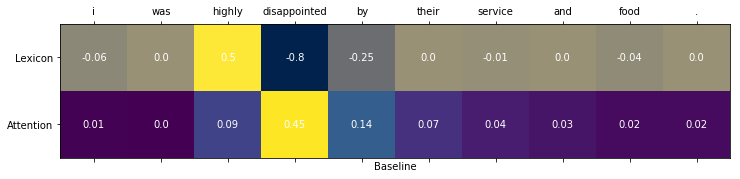

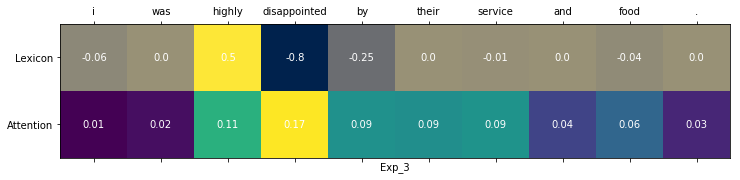

In [78]:
compare(95)

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   food

                NEG        NEU       POS
BASE_PROB  0.134204  0.0258417  0.839954
                NEG        NEU       POS
EXP3_PROB  0.600423  0.0673491  0.332228


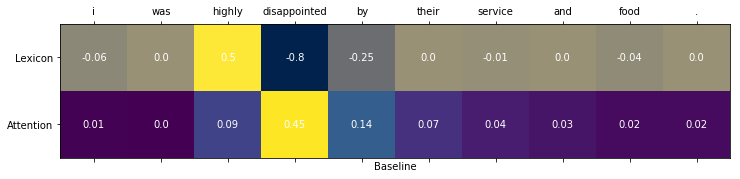

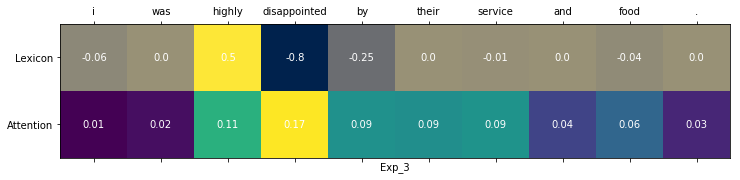

In [79]:
compare(96)

Two examples correcting the word "disappointed"

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   service

               NEG      NEU      POS
BASE_PROB  0.34524  0.10127  0.55349
               NEG       NEU       POS
EXP3_PROB  0.49627  0.202097  0.301633


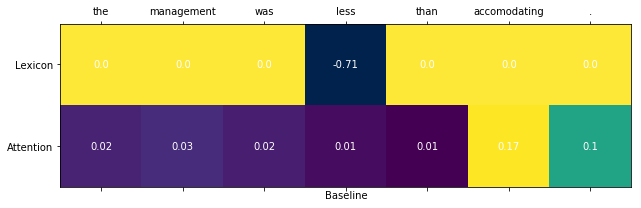

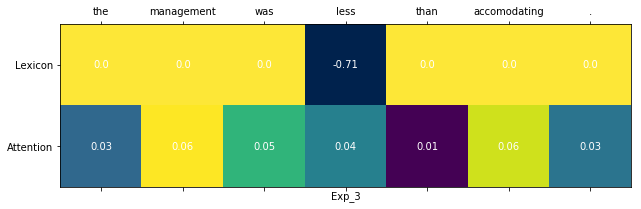

In [80]:
compare(118)

This one expands attention to wider parts of the sentence and pay attention to negative word wihle able to disgtinguish positive word (though word "accomodating" is not in lexicon)

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   ambience

                NEG       NEU       POS
BASE_PROB  0.325933  0.260841  0.413226
                NEG       NEU       POS
EXP3_PROB  0.419573  0.281321  0.299106


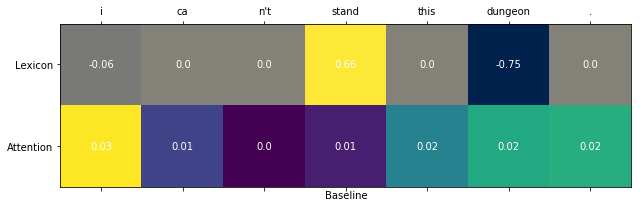

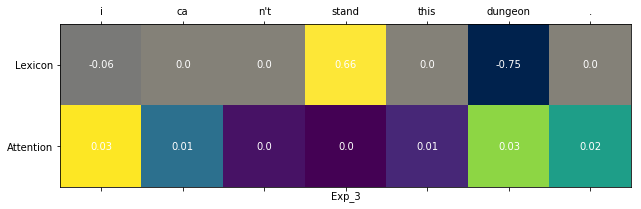

In [83]:
compare(228)

Another example of correcting obvious negative word. Though "stand" is quite positive in the lexicon, the model learns to ignore it.

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   miscellaneous

               NEG       NEU       POS
BASE_PROB  0.31035  0.247867  0.441783
                NEG       NEU       POS
EXP3_PROB  0.366094  0.297307  0.336599


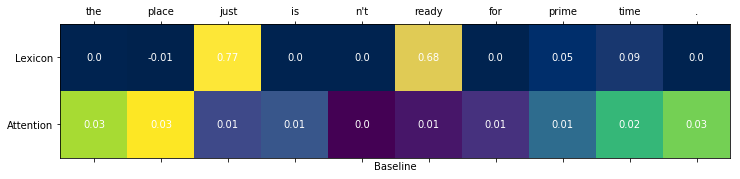

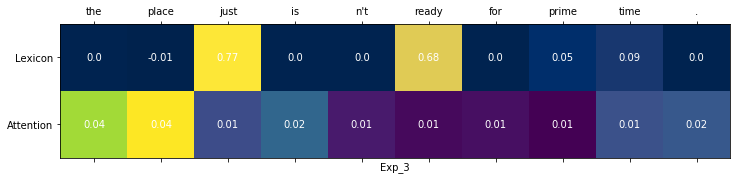

In [92]:
compare(391)

Not so confident in negative but able to pay less attention to the "prime time" part

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   miscellaneous

               NEG       NEU       POS
BASE_PROB  0.31048  0.264039  0.425481
                NEG       NEU      POS
EXP3_PROB  0.386663  0.351476  0.26186


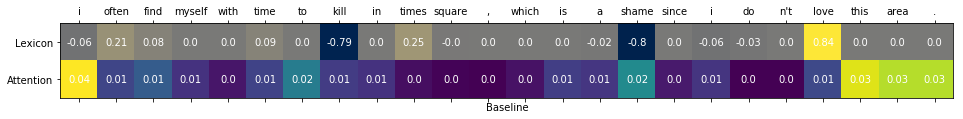

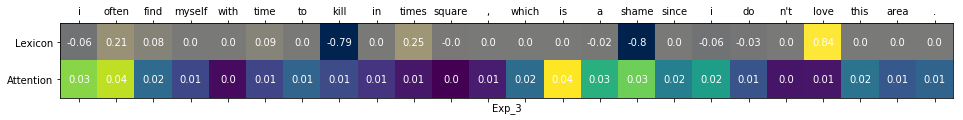

In [94]:
compare(472, figsize=(16,3))

Another example of: ignore negative but irelevent words in lexicon ("kill"), expand attention (instead of looking at "shame" only, looking at surrundings as well), paying attention to relevent negative words.

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   food

               NEG       NEU       POS
BASE_PROB  0.23763  0.025827  0.736543
                NEG        NEU       POS
EXP3_PROB  0.809599  0.0701801  0.120221


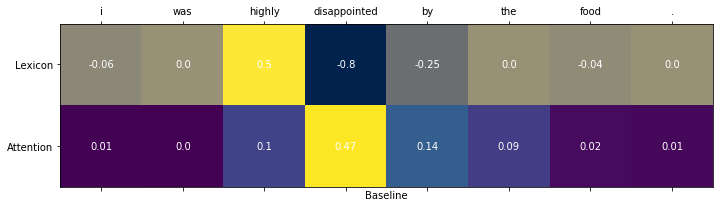

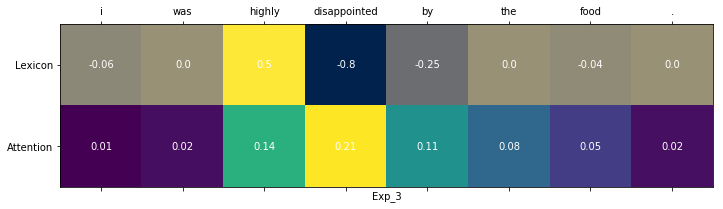

In [95]:
compare(475)

Another example of correcting obivous negative word

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   miscellaneous

                NEG       NEU       POS
BASE_PROB  0.404404  0.110236  0.485359
                NEG       NEU       POS
EXP3_PROB  0.520499  0.162696  0.316805


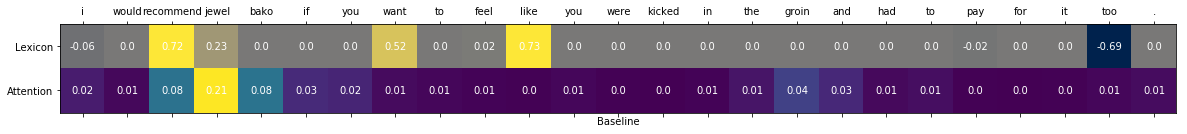

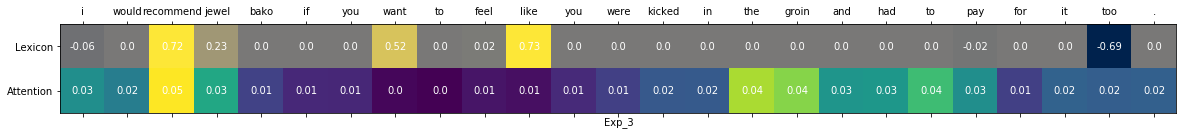

In [99]:
compare(523, figsize=(20,3))

Suprisingly, baseline only looks at the part "would recommend", however, exp_3 would look at wider parts of the sentence. Also ignoring irelevment negative word

PRED:  Base: 1, Exp3: 0
LABEL: 0
ASP:   miscellaneous

                NEG       NEU       POS
BASE_PROB  0.254133  0.299288  0.446579
                NEG       NEU       POS
EXP3_PROB  0.266902  0.367027  0.366071


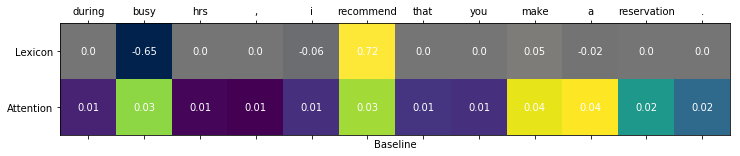

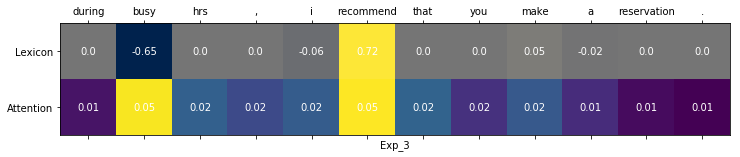

In [100]:
compare(551)

By chance? Could machine learns a simple logic: `Sentence with one positive word and a negative word is netural`?

PRED:  Base: -1, Exp3: 1
LABEL: 1
ASP:   miscellaneous

                NEG       NEU       POS
BASE_PROB  0.516535  0.134863  0.348602
                NEG        NEU       POS
EXP3_PROB  0.383147  0.0862789  0.530574


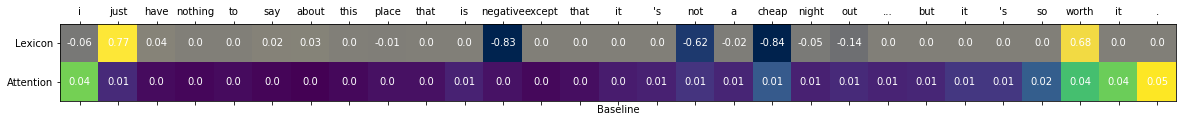

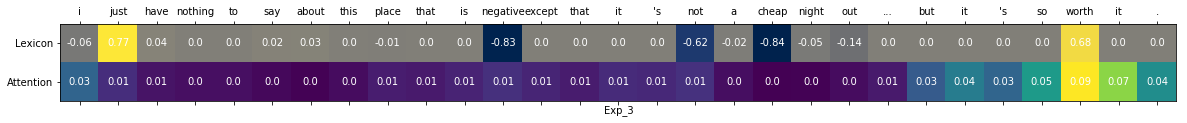

In [103]:
compare(558, figsize=(20,3))

Pay significantly more attention to the most important part of the sentence with wider attention. Also notice that for `miscellaneous` aspect, model tends to look at "i" word.

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   service

                NEG        NEU       POS
BASE_PROB  0.363497  0.0508111  0.585692
                NEG       NEU       POS
EXP3_PROB  0.738751  0.153169  0.108079


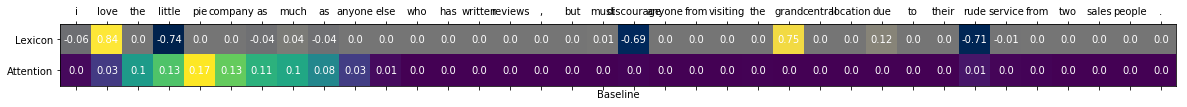

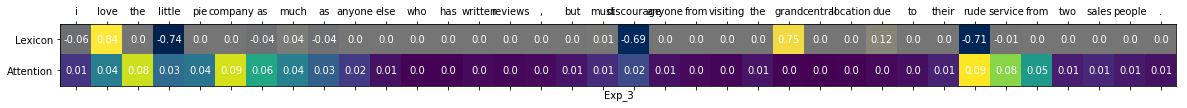

In [105]:
compare(604, figsize=(20,3))

Another example of being able to pay attention to the "most important" part of the sentence, in terms of deciding sentiment

PRED:  Base: 0, Exp3: 1
LABEL: 1
ASP:   food

                NEG       NEU       POS
BASE_PROB  0.319221  0.436672  0.244107
                NEG       NEU       POS
EXP3_PROB  0.329942  0.300876  0.369182


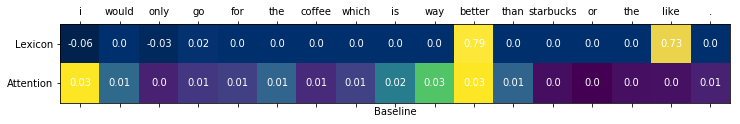

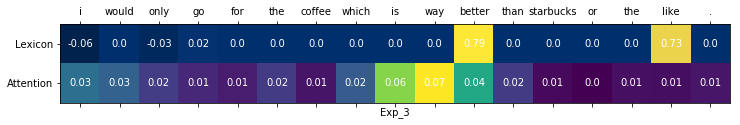

In [106]:
compare(614)

Wider attention, way much more on "way" and more on "better", ignore unrelevent postitive word "like".

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   food

                NEG        NEU       POS
BASE_PROB  0.302578  0.0687875  0.628635
               NEG      NEU       POS
EXP3_PROB  0.53324  0.10821  0.358549


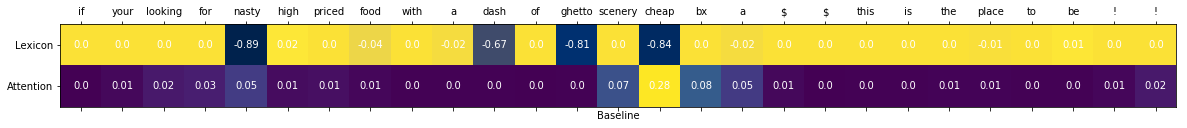

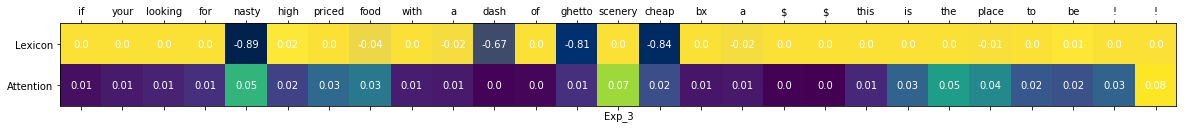

In [108]:
compare(617, figsize=(20,3))

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   price

                NEG        NEU       POS
BASE_PROB  0.302578  0.0687875  0.628635
               NEG      NEU       POS
EXP3_PROB  0.53324  0.10821  0.358549


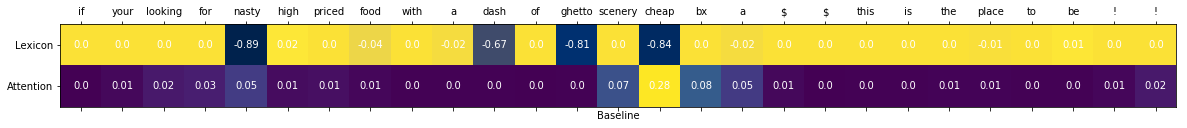

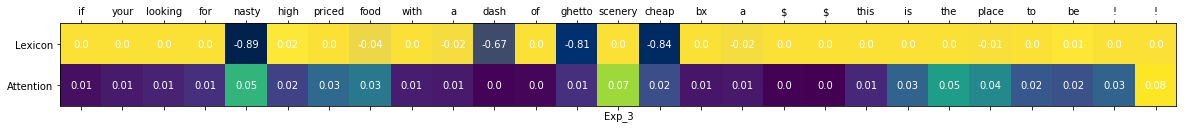

In [110]:
compare(618, figsize=(20,3))

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   ambience

                NEG        NEU       POS
BASE_PROB  0.302578  0.0687875  0.628635
               NEG      NEU       POS
EXP3_PROB  0.53324  0.10821  0.358549


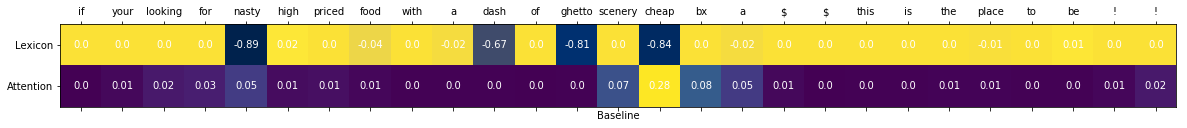

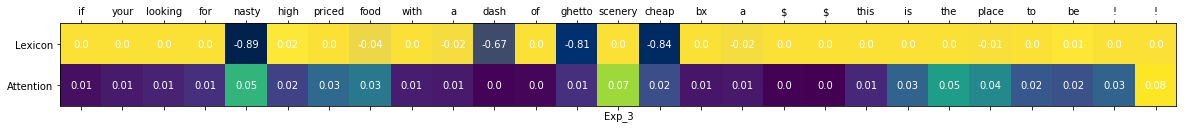

In [112]:
compare(619, figsize=(20,3))

- Quite a complex sentence for 3 different aspect but glad exp_3 got it right :)
- Seems exp_3 are able to handle longer sentences, why is that? Adding lexicon is not expected to help on these cases.
- Same probability for different aspects, same for previous "disappointed" examples

PRED:  Base: -1, Exp3: 1
LABEL: 1
ASP:   food

               NEG       NEU       POS
BASE_PROB  0.60611  0.152203  0.241686
                NEG      NEU       POS
EXP3_PROB  0.379838  0.18144  0.438721


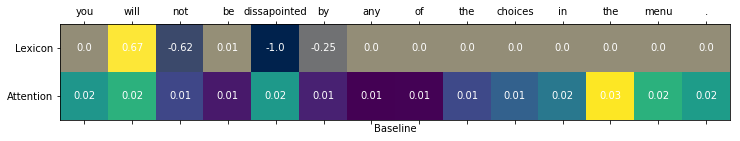

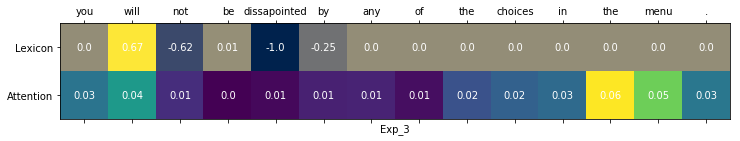

In [113]:
compare(643)

Though more attention to the end parts of the sentence is not making too much sense (maybe food related to menu), exp_3 is able to ignore "disappointed", which is a very good complementry example of correcting "disappointed"

PRED:  Base: 0, Exp3: 1
LABEL: 1
ASP:   miscellaneous

                 NEG      NEU       POS
BASE_PROB  0.0615245  0.55868  0.379795
                NEG       NEU       POS
EXP3_PROB  0.083903  0.402969  0.513128


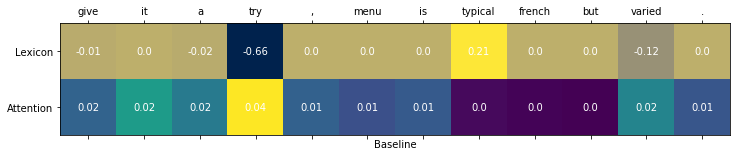

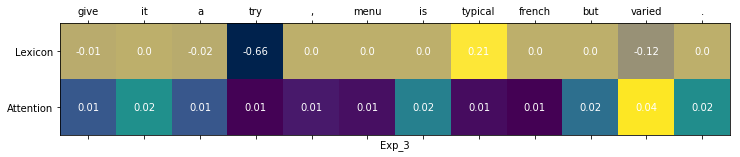

In [114]:
compare(664)

An example of payting attention to slightly negative lexicon word but able to predict positive overall. By chance? Aspect is not very obvious

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   ambience

                 NEG        NEU       POS
BASE_PROB  0.0970659  0.0134675  0.889467
                NEG       NEU       POS
EXP3_PROB  0.583668  0.072357  0.343975


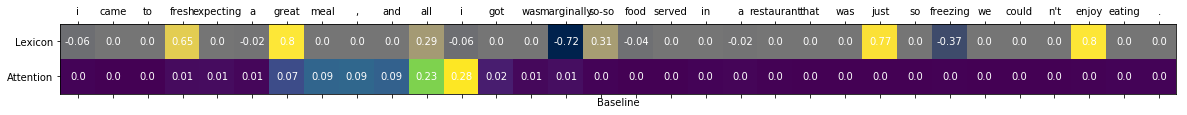

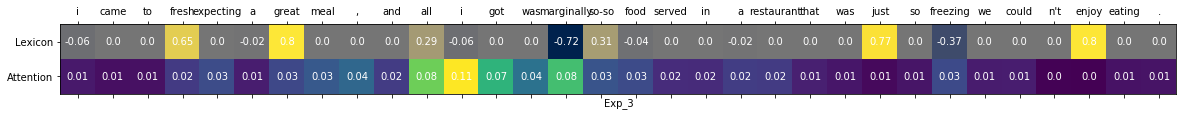

In [123]:
compare(700, figsize=(20,3))

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   food

                 NEG        NEU       POS
BASE_PROB  0.0970659  0.0134675  0.889467
                NEG       NEU       POS
EXP3_PROB  0.583668  0.072357  0.343975


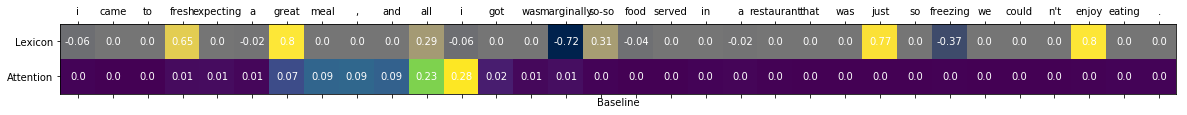

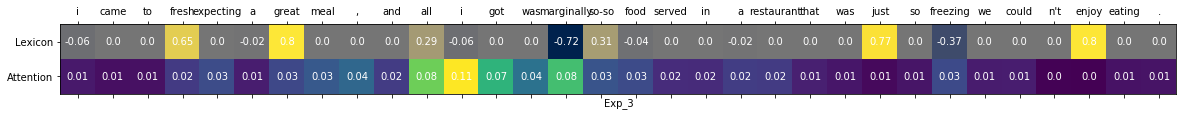

In [125]:
compare(701, figsize=(20,3))

Baseline seems to be satisfied by first thing interesting found, exp_3 is able to continue looking at other parts

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   food

                NEG       NEU       POS
BASE_PROB  0.230714  0.249444  0.519842
                NEG       NEU       POS
EXP3_PROB  0.485591  0.207262  0.307147


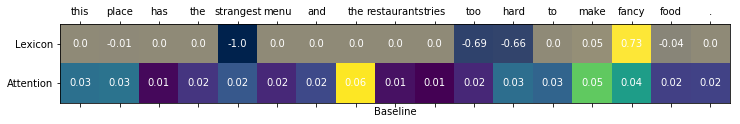

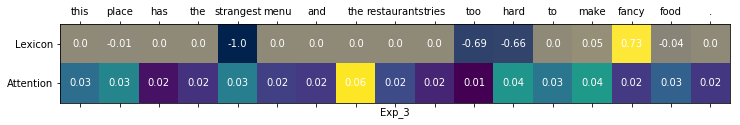

In [126]:
compare(731)

Exp_3 is able to pay more attention to relevent negative words to correct baseline

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   ambience

                NEG       NEU       POS
BASE_PROB  0.310873  0.292965  0.396161
                NEG       NEU       POS
EXP3_PROB  0.415614  0.229301  0.355086


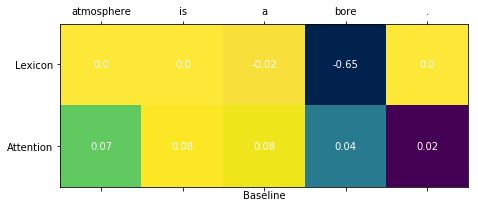

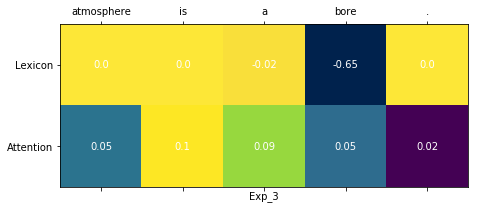

In [127]:
compare(767)

Another example of correcting obvious negative words

PRED:  Base: 0, Exp3: 1
LABEL: 1
ASP:   food

                 NEG       NEU      POS
BASE_PROB  0.0562294  0.515981  0.42779
                 NEG       NEU       POS
EXP3_PROB  0.0298731  0.222448  0.747679


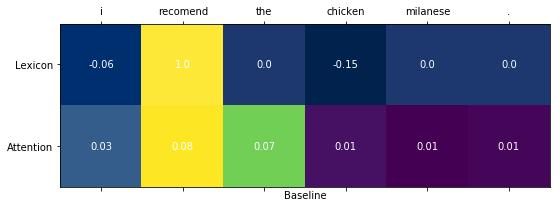

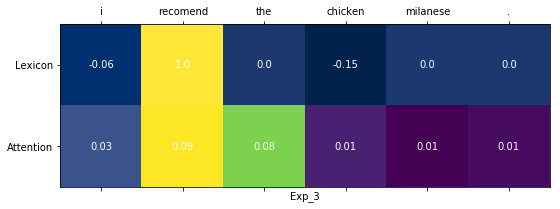

In [128]:
compare(799)

Yet another example of correcting obvious sentence

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   food

                NEG        NEU       POS
BASE_PROB  0.433081  0.0184227  0.548497
                NEG        NEU       POS
EXP3_PROB  0.850288  0.0443137  0.105399


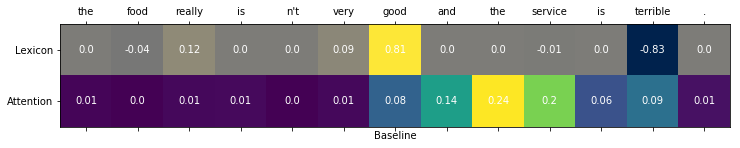

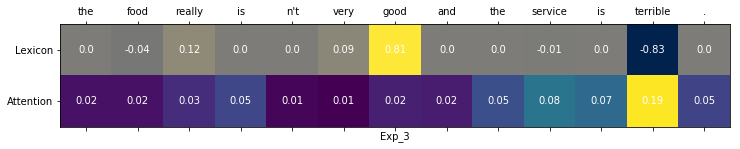

In [130]:
compare(818)

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   service

                NEG        NEU       POS
BASE_PROB  0.433081  0.0184227  0.548497
                NEG        NEU       POS
EXP3_PROB  0.850288  0.0443137  0.105399


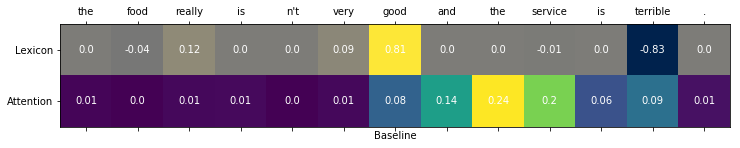

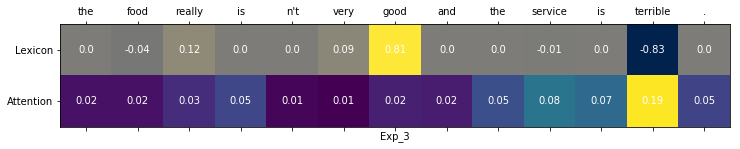

In [131]:
compare(819)

Exp_3 learns to ignore "good" and look at "terrible"

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   food

                NEG       NEU      POS
BASE_PROB  0.150785  0.107125  0.74209
                NEG       NEU      POS
EXP3_PROB  0.445127  0.160042  0.39483


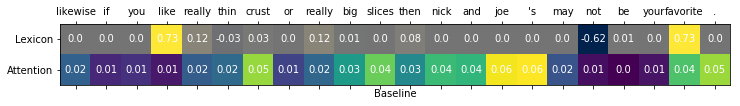

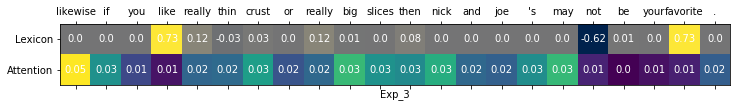

In [135]:
compare(854)

Wider attention and able to "ignore" the last part of the sentence. I think from what I've observed, the model learns to say negative with payting no attention to the negative part. Anyway this example is very interesting.

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   service

                NEG        NEU       POS
BASE_PROB  0.446761  0.0926873  0.460551
                NEG       NEU       POS
EXP3_PROB  0.633101  0.149008  0.217892


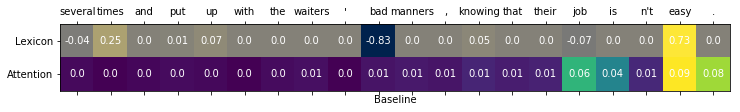

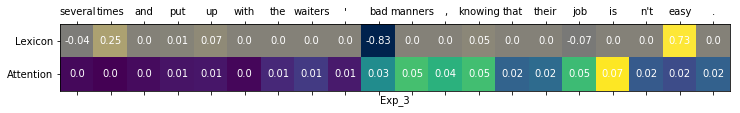

In [136]:
compare(941)

Better attention to pay more attention to other more important parts of the sentence to get a better idea of the big picture

PRED:  Base: 1, Exp3: 0
LABEL: 0
ASP:   food

                 NEG       NEU       POS
BASE_PROB  0.0169907  0.460162  0.522847
                 NEG       NEU       POS
EXP3_PROB  0.0297605  0.702163  0.268077


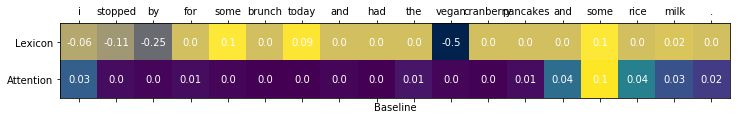

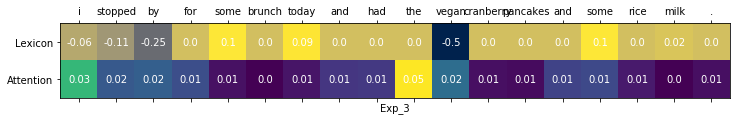

In [139]:
compare(962)

Able to ignore the negative word in lexicon, remain good understanding of the whole sentence

--------------------

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   miscellaneous

                NEG       NEU       POS
BASE_PROB  0.172669  0.241199  0.586133
                NEG       NEU       POS
EXP3_PROB  0.419332  0.288581  0.292087


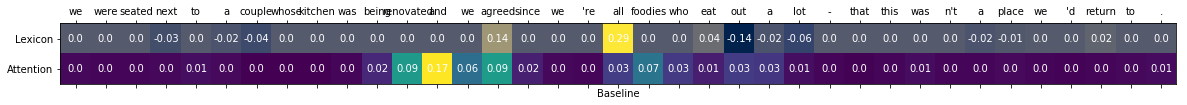

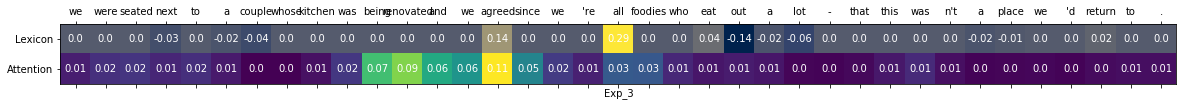

In [138]:
compare(943, figsize=(20,3))

PRED:  Base: 0, Exp3: 1
LABEL: 1
ASP:   food

                NEG       NEU       POS
BASE_PROB  0.146347  0.432488  0.421165
               NEG       NEU       POS
EXP3_PROB  0.11228  0.255577  0.632143


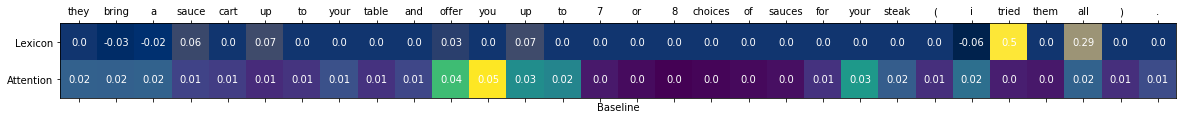

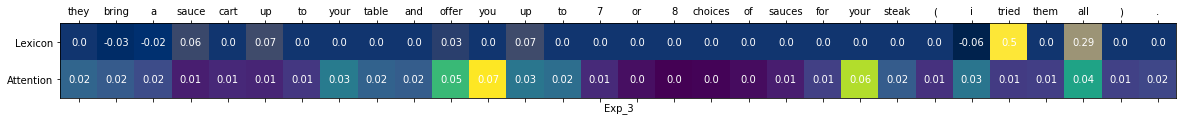

In [134]:
compare(851, figsize=(20,3))

Somehow exp_3 made it!

PRED:  Base: 1, Exp3: 0
LABEL: 0
ASP:   miscellaneous

                NEG      NEU       POS
BASE_PROB  0.148525  0.38909  0.462385
                NEG       NEU      POS
EXP3_PROB  0.121384  0.458346  0.42027


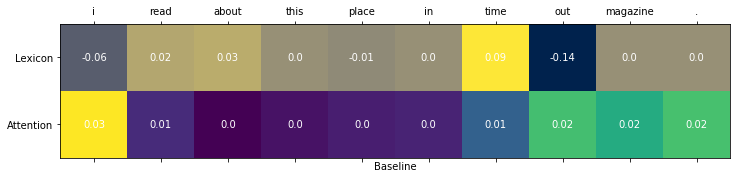

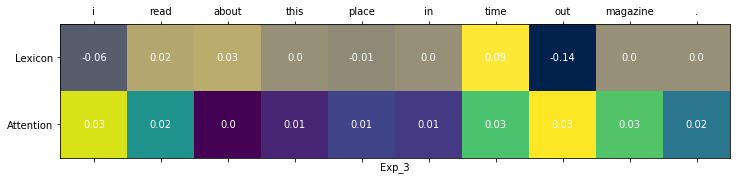

In [132]:
compare(844)

PRED:  Base: 0, Exp3: -1
LABEL: -1
ASP:   food

                NEG       NEU       POS
BASE_PROB  0.379313  0.403352  0.217335
                NEG       NEU       POS
EXP3_PROB  0.407638  0.350708  0.241654


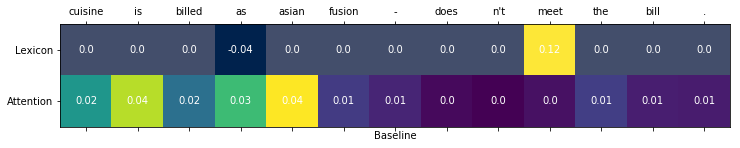

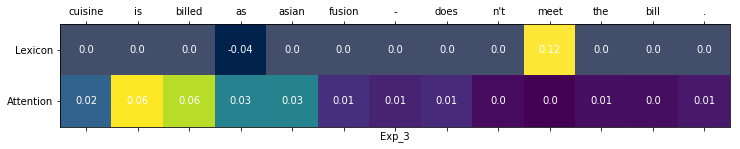

In [121]:
compare(695)

PRED:  Base: 0, Exp3: -1
LABEL: -1
ASP:   price

                NEG       NEU       POS
BASE_PROB  0.379313  0.403352  0.217335
                NEG       NEU       POS
EXP3_PROB  0.407638  0.350708  0.241654


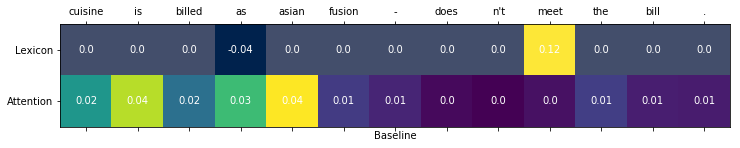

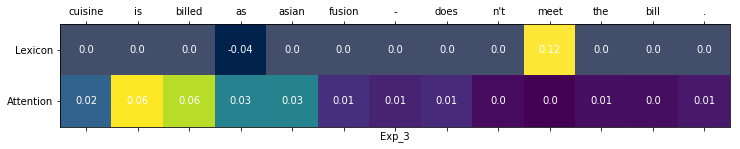

In [120]:
compare(694)

PRED:  Base: 1, Exp3: 0
LABEL: 0
ASP:   food

                NEG       NEU       POS
BASE_PROB  0.250427  0.294706  0.454867
                NEG       NEU       POS
EXP3_PROB  0.278086  0.408728  0.313186


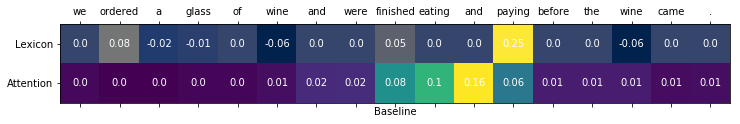

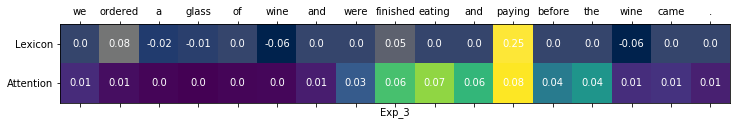

In [119]:
compare(671)

PRED:  Base: -1, Exp3: 1
LABEL: 1
ASP:   food

                NEG        NEU       POS
BASE_PROB  0.545139  0.0434536  0.411407
                NEG        NEU       POS
EXP3_PROB  0.363978  0.0307937  0.605228


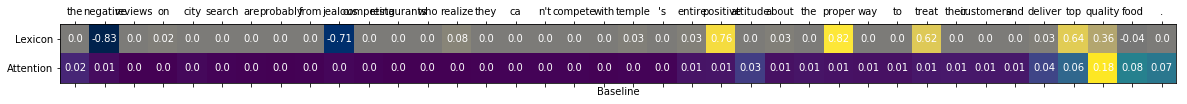

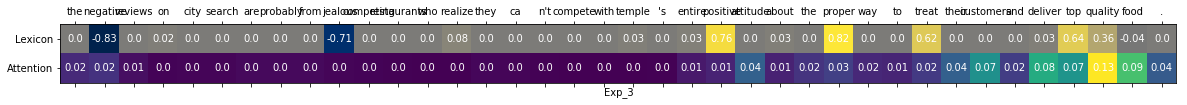

In [118]:
compare(669, figsize=(20,3))

PRED:  Base: -1, Exp3: 1
LABEL: 1
ASP:   service

                NEG        NEU       POS
BASE_PROB  0.545139  0.0434536  0.411407
                NEG        NEU       POS
EXP3_PROB  0.363978  0.0307937  0.605228


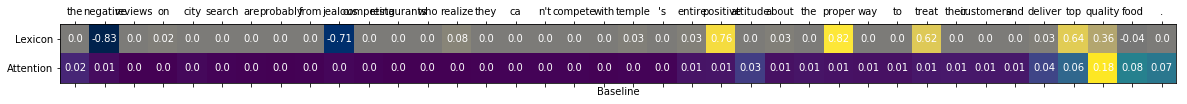

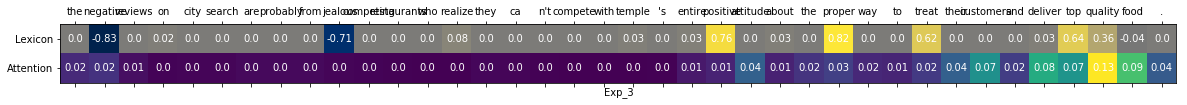

In [116]:
compare(668, figsize=(20,3))

Another set of examples of long senttence and able to go striaight to key parts of the sentence

PRED:  Base: 1, Exp3: 0
LABEL: 0
ASP:   miscellaneous

                 NEG       NEU       POS
BASE_PROB  0.0678862  0.403439  0.528675
                NEG       NEU       POS
EXP3_PROB  0.112656  0.497682  0.389661


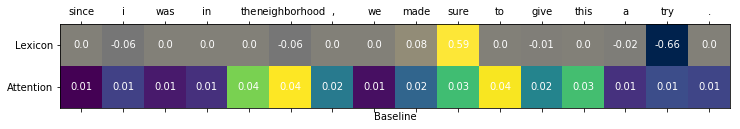

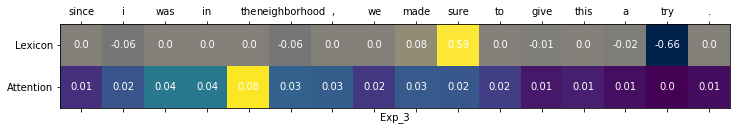

In [91]:
compare(331)

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   service

                NEG       NEU       POS
BASE_PROB  0.292198  0.221455  0.486347
                NEG       NEU       POS
EXP3_PROB  0.460233  0.205719  0.334048


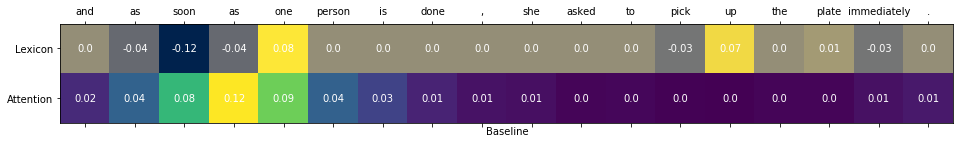

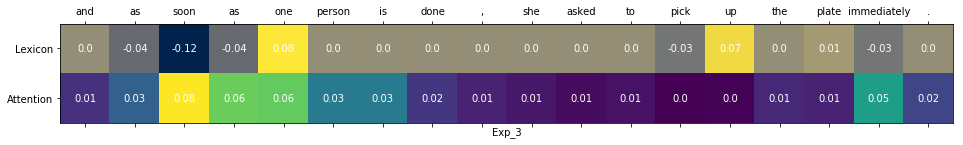

In [90]:
compare(262, figsize=(16,3))

PRED:  Base: 0, Exp3: -1
LABEL: -1
ASP:   service

               NEG      NEU      POS
BASE_PROB  0.38966  0.42263  0.18771
                NEG       NEU       POS
EXP3_PROB  0.409899  0.368325  0.221776


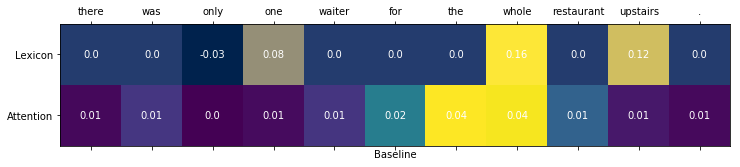

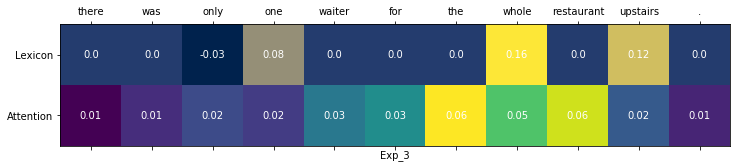

In [87]:
compare(214)

PRED:  Base: 1, Exp3: -1
LABEL: -1
ASP:   food

                NEG      NEU       POS
BASE_PROB  0.215336  0.20396  0.580704
                NEG       NEU       POS
EXP3_PROB  0.470175  0.338154  0.191671


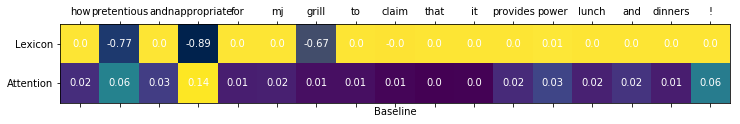

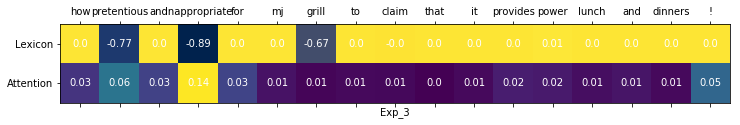

In [77]:
compare(48)